In [1]:
import random

def dirichlet_sample(alpha):
    # Generate gamma-distributed random variables
    gammas = [random.gammavariate(a, 1) for a in alpha]
    
    # Compute the sum of gamma variables
    gamma_sum = sum(gammas)
    
    # Normalize to obtain Dirichlet samples
    dirichlet_samples = [gamma / gamma_sum for gamma in gammas]
    
    return dirichlet_samples

# Set the concentration parameters
alpha = [1, 1, 1]  # Example parameters for a Dirichlet distribution with 3 components

# Generate random samples from the Dirichlet distribution
samples = [dirichlet_sample(alpha) for _ in range(10)]

print(samples)

[[0.24016739299928158, 0.25143127217457395, 0.5084013348261446], [0.0901024054421242, 0.18445422552834012, 0.7254433690295357], [0.0929152419877443, 0.7416804046170425, 0.16540435339521303], [0.039563052357497984, 0.9155882028624494, 0.04484874478005277], [0.02766269929280141, 0.9577166400844723, 0.014620660622726295], [0.8275562024932838, 0.03703586514087346, 0.13540793236584286], [0.454455235463064, 0.14345004171548714, 0.4020947228214489], [0.820013343037445, 0.13686891741344373, 0.043117739549111224], [0.12296612285245317, 0.7557315631609421, 0.12130231398660468], [0.18936037411315434, 0.39146107254857804, 0.41917855333826765]]


The Dirichlet distribution is a multivariate probability distribution defined on a fixed-dimensional simplex. It is often used as a prior distribution for modeling proportions or probabilities over multiple categories. The Dirichlet distribution takes a set of concentration parameters (α_1, α_2, ..., α_k) as input, where k is the number of categories or components. It generates random vectors (θ_1, θ_2, ..., θ_k) representing the proportions or probabilities of each category. The Dirichlet distribution has a well-defined probability density function (PDF), allowing us to compute the likelihood of observing specific proportions.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

# Set the concentration parameters
alpha = [1, 2, 3]  # Example parameters for a Dirichlet distribution with 3 components

# Define the Dirichlet distribution
dist = dirichlet(alpha)

# Generate a grid of points in the simplex
resolution = 0.01
x = np.arange(0, 1 + resolution, resolution)
y = np.arange(0, 1 + resolution, resolution)
X, Y = np.meshgrid(x, y)

# Compute the PDF for each point in the grid
Z = dist.pdf(np.stack((X.flatten(), Y.flatten()), axis=1))
Z = Z.reshape(X.shape)

# Plot the PDF
plt.contourf(X, Y, Z, levels=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('PDF of Dirichlet Distribution')
plt.colorbar()
plt.show()

/home/ines/miniconda3/envs/glmhmm/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ines/miniconda3/envs/glmhmm/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ines/miniconda3/envs/glmhmm/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


ValueError: Vector 'x' must have either the same number of entries as, or one entry fewer than, parameter vector 'a', but alpha.shape = (3,) and x.shape = (10201, 2).

The Dirichlet process is a stochastic process that defines a distribution over probability measures. It is used as a prior in Bayesian nonparametric modeling, allowing for infinite-dimensional parameter spaces. The Dirichlet process is characterized by two parameters: a base distribution (often called the "base measure") and a concentration parameter (often denoted as α). The base distribution represents the probability distribution from which the samples are drawn, while the concentration parameter controls the concentration or "stickiness" of the process. The Dirichlet process does not have a fixed-dimensional representation like the Dirichlet distribution. Instead, it defines a distribution over distributions, allowing for the generation of an infinite number of random measures.

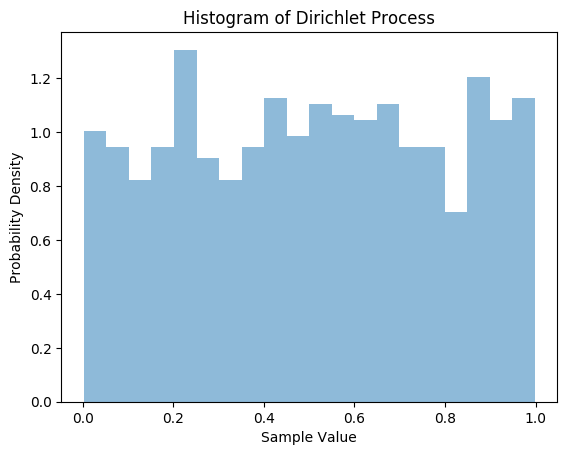

In [23]:
import matplotlib.pyplot as plt
import random

def dirichlet_process(alpha, num_samples):
    # Generate samples from the Dirichlet process
    samples = []
    for _ in range(num_samples):
        beta = random.betavariate(1, alpha)
        samples.append(beta)

    return samples

# Set the concentration parameter
alpha = 1.0

# Generate Dirichlet process samples
num_samples = 1000
samples = dirichlet_process(alpha, num_samples)

# Plot the histogram
plt.hist(samples, bins=20, density=True, alpha=0.5)
plt.xlabel('Sample Value')
plt.ylabel('Probability Density')
plt.title('Histogram of Dirichlet Process')
plt.show()

### Stick breaking construction

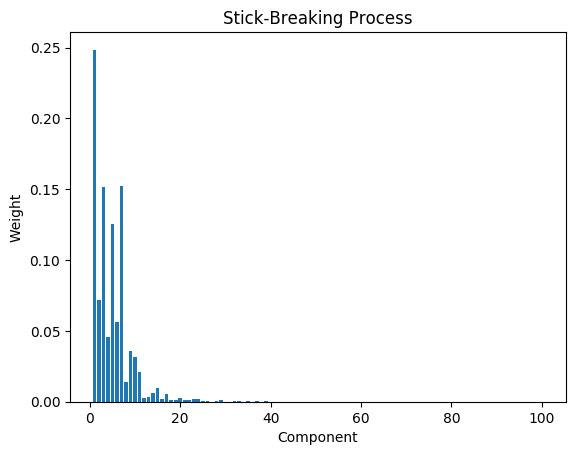

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def stick_breaking(concentration, num_components):
    remaining_stick = 1.0
    betas = np.random.beta(1, concentration, num_components)
    weights = []

    for beta in betas:
        weight = beta * remaining_stick
        weights.append(weight)
        remaining_stick -= weight

    return weights

concentration = 5.0
num_components = 100

weights = stick_breaking(concentration, num_components)

# Plotting the stick-breaking process
plt.bar(range(1, num_components+1), weights, align='center')
plt.xlabel('Component')
plt.ylabel('Weight')
plt.title('Stick-Breaking Process')
plt.show()

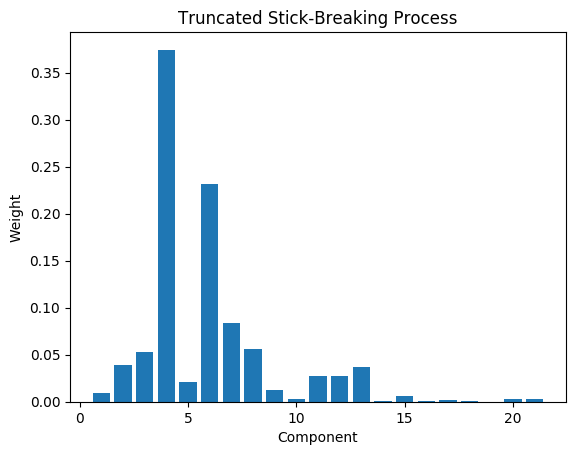

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def truncated_stick_breaking(concentration, threshold):
    remaining_stick = 1.0
    betas = []
    weights = []

    while remaining_stick > threshold:
        beta = np.random.beta(1, concentration)
        weight = beta * remaining_stick
        betas.append(beta)
        weights.append(weight)
        remaining_stick -= weight

    return weights

concentration = 5.0
threshold = 0.01  # Example threshold value

weights = truncated_stick_breaking(concentration, threshold)

# Plotting the truncated stick-breaking process
plt.bar(range(1, len(weights) + 1), weights, align='center')
plt.xlabel('Component')
plt.ylabel('Weight')
plt.title('Truncated Stick-Breaking Process')
plt.show()

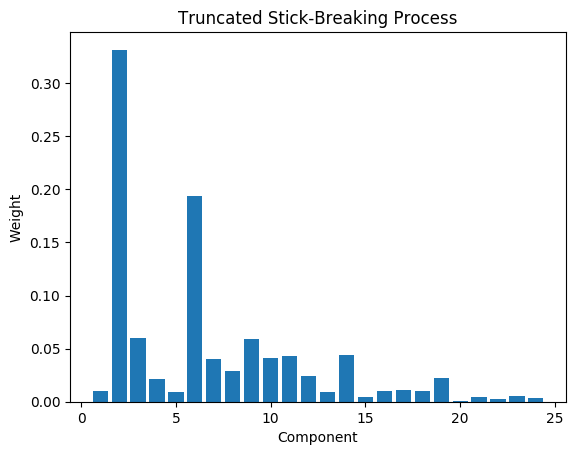

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def truncated_stick_breaking(concentration, threshold):
    remaining_stick = 1.0
    betas = []
    weights = []

    while remaining_stick > threshold:
        beta = np.random.beta(1, concentration)
        weight = beta * remaining_stick
        betas.append(beta)
        weights.append(weight)
        remaining_stick -= weight

    return weights

concentration = 5.0
threshold = 0.01  # Example threshold value

weights = truncated_stick_breaking(concentration, threshold)

# Plotting the truncated stick-breaking process
plt.bar(range(1, len(weights) + 1), weights, align='center')
plt.xlabel('Component')
plt.ylabel('Weight')
plt.title('Truncated Stick-Breaking Process')
plt.show()

### Gibbs sampling

- MCMC methods are based on the concept of constructing a Markov chain that converges to the desired probability distribution. Markov chains are stochastic processes where the future state depends only on the current state, not the past states. The idea behind MCMC is to design a Markov chain that has the desired distribution as its equilibrium distribution, meaning that after a sufficient number of steps, the chain will converge to sampling from the desired distribution.
- Usually sampling from the joint distribution is very difficult but from the joint is not as hard

In [36]:
import numpy as np

def gibbs_sampling(num_samples, initial_values, cov_matrix):
    # Initialize variables
    x = initial_values[0]
    y = initial_values[1]
    samples = np.zeros((num_samples, 2))

    for i in range(num_samples):
        # Sample x given y
        x = np.random.normal(cov_matrix[0, 1] / cov_matrix[1, 1] * (y - cov_matrix[1, 0]) + cov_matrix[0, 0], 
                             np.sqrt(cov_matrix[0, 0] - cov_matrix[0, 1] / cov_matrix[1, 1] * cov_matrix[1, 0]))

        # Sample y given x
        y = np.random.normal(cov_matrix[1, 0] / cov_matrix[0, 0] * (x - cov_matrix[0, 1]) + cov_matrix[1, 1], 
                             np.sqrt(cov_matrix[1, 1] - cov_matrix[1, 0] / cov_matrix[0, 0] * cov_matrix[0, 1]))

        # Store the samples
        samples[i, 0] = x
        samples[i, 1] = y

    return samples

# Define parameters
num_samples = 1000
initial_values = [0, 0]
cov_matrix = np.array([[1, 0.5], [0.5, 1]])

# Perform Gibbs sampling
samples = gibbs_sampling(num_samples, initial_values, cov_matrix)

# Print the samples
print(samples)

[[-0.59233389  0.54613178]
 [-0.5808625  -0.6004708 ]
 [ 0.69557289  0.34380877]
 ...
 [ 2.22584978  1.07397728]
 [ 1.13908376  2.06619414]
 [ 2.88441155  2.17917805]]
